In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
from nltk import word_tokenize
from collections import defaultdict
from FightingWords.fighting_words_py3 import bayes_compare_language
from FightingWords.fighting_words_py3 import basic_sanitize
from matplotlib import pyplot as plt 
from adjustText import adjust_text
from tqdm import tqdm
import spacy
nlp=spacy.load('en_core_web_sm')

/Users/mstudio/miniconda3/envs/py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/sent/'
df=pd.read_csv(path+'coolie-lemma-df-sent2.csv', converters={'state':literal_eval, 'context':literal_eval, 'city':literal_eval, 'sent_token':literal_eval})

In [3]:
df['sent_lemma']=df['sent_lemma'].astype(str)

In [17]:
df.loc[0, 'sent_lemma']

'cholera break steamer laden ohinoso'

In [4]:
df['state_str']=df['state'].str[0]

In [5]:
descriptive=df.groupby('state_str').size().reset_index(name='count').sort_values(by='count', ascending=False)
# descriptive['count'].sum()
descriptive

,state_str,count
8,District of Columbia,9995
11,Hawaii,8157
31,New York,6749
4,California,6545
23,Minnesota,3846
13,Illinois,3453
27,Nebraska,3071
6,Connecticut,3044
34,Ohio,2956
48,Washington,2900


In [6]:
south_states=['West Virginia','Virginia',
              'Tennessee','Arkansas','Florida',
              'Alabama','Louisiana','North Carolina',
              'South Carolina','Mississippi',
              'Texas','Georgia']

In [38]:
outlier_states=['New York', 'Kentucky', 'Texas', 'Florida', 'Utah', 'Hawaii', 'Discrict of Columbia']

In [7]:
south=df[df['state_str'].isin(south_states)]
rest=df[~df['state_str'].isin(south_states)]

In [39]:
outlier=df[df['state_str'].isin(outlier_states)]
rest=df[~df['state_str'].isin(outlier_states)]

In [8]:
print(south.shape, rest.shape)

(21389, 10) (96665, 10)


In [40]:
print(outlier.shape, rest.shape)

(20123, 10) (97931, 10)


In [9]:
language=bayes_compare_language(rest['sent_lemma'], south['sent_lemma'])

Vocab size is 15000
Comparing language...


In [41]:
language=bayes_compare_language(rest['sent_lemma'], outlier['sent_lemma'])

Vocab size is 15000
Comparing language...


In [10]:
language_z_df=pd.DataFrame(language, columns=['token', 'z-score'])

In [42]:
language_z_df_outlier=pd.DataFrame(language, columns=['token', 'z-score'])

In [65]:
df[df['sent_lemma'].str.contains('health')].groupby(by='state_str').count().sort_values(by='sent_lemma', ascending=False)[:5]

,state,city,date,lccn,sent,title,context,sent_lemma,sent_token
state_str,,,,,,,,,
Utah,634,634,634,634,634,634,634,634,634
District of Columbia,405,405,405,405,405,405,405,405,405
New York,290,290,290,290,290,290,290,290,290
Kentucky,228,228,228,228,228,228,228,228,228
Hawaii,173,173,173,173,173,173,173,173,173


In [76]:
df[(df['sent_lemma'].str.contains('health'))&(df['state_str']=='New York')]

,state,city,date,lccn,sent,title,context,sent_lemma,sent_token,state_str
1666,[New York],[New York],18941111,sn83030272,3\nir\nf ll\n= the sun cirivflsav november 1 t...,The sun. [volume],[3\nir\nf ll\n= the sun cirivflsav november 1 ...,ir f sun cirivflsav november n tl nog patagoni...,"[ir, f, sun, cirivflsav, november, n, tl, nog,...",New York
2523,[New York],[New York],19060107,sn83030272,sunday janttary 7 1906\nsunday jantahy 7 toooe...,The sun. [volume],[sunday janttary 7 1906\nsunday jantahy 7 tooo...,sunday janttary sunday jantahy toooentere ente...,"[sunday, janttary, sunday, jantahy, toooentere...",New York
5263,[New York],[New York],18870619,sn83030272,1 < v i r p 11irn f y1 lijll i w1 in yjrfjj ry...,The sun. [volume],[1 < v i r p 11irn f y1 lijll i w1 in yjrfjj r...,v I r p f lijll I yjrfjj rylfj wf j jwt w sun ...,"[v, I, r, p, f, lijll, I, yjrfjj, rylfj, wf, j...",New York
5268,[New York],[New York],18840926,sn83030272,imt a l\ni r\nf\nolf\ni t\n03\ne j\ny\ni l\nt\...,The sun. [volume],[imt a l\ni r\nf\nolf\ni t\n03\ne j\ny\ni l\nt...,imt l I r f olf I e j I l vol liino new york f...,"[imt, l, I, r, f, olf, I, e, j, I, l, vol, lii...",New York
5269,[New York],[New York],18840330,sn83030272,j 11 op vth 1 i f r 1 i i r r r i f t i c j j ...,The sun. [volume],[j 11 op vth 1 i f r 1 i i r r r i f t i c j j...,j op vth I f r I I r r r I f I c j j r j j I r...,"[j, op, vth, I, f, r, I, I, r, r, r, I, f, I, ...",New York
...,...,...,...,...,...,...,...,...,...,...
115927,[New York],[New York],19090117,sn83030272,p 1il\ni t r\nf\nil 4 the sun sunday january 1...,The sun. [volume],[p 1il\ni t r\nf\nil 4 the sun sunday january ...,p I r f il sun sunday january chinese ruler di...,"[p, I, r, f, il, sun, sunday, january, chinese...",New York
116722,[New York],[New York],19040518,sn83030272,t\na j jj\nl e > c\nj f\n1 the sunwednesdayfma...,The sun. [volume],[t\na j jj\nl e > c\nj f\n1 the sunwednesdayfm...,j jj l e c j f sunwednesdayfmayj sdayi may w f...,"[j, jj, l, e, c, j, f, sunwednesdayfmayj, sday...",New York
116723,[New York],[New York],19040823,sn83030272,n n 1i 1ih c 4 t1ie sunatuesday autjs23 1od4 i...,The sun. [volume],[n n 1i 1ih c 4 t1ie sunatuesday autjs23 1od4 ...,n n c sunatuesday I h u f hti chef oo incident...,"[n, n, c, sunatuesday, I, h, u, f, hti, chef, ...",New York
116735,[New York],[New York],19070320,sn83030272,j = v ua uaii\nv\nj\nflhl i1itv ri ril\nwttt w...,The sun. [volume],[j = v ua uaii\nv\nj\nflhl i1itv ri ril\nwttt ...,j v ua uaii v j flhl ri ril wttt ww r ii I l e...,"[j, v, ua, uaii, v, j, flhl, ri, ril, wttt, ww...",New York


In [78]:
df[(df['sent_lemma'].str.contains('health'))&(df['state_str']=='New York')].loc[1666, 'sent']

'3\nir\nf ll\n= the sun cirivflsav november 1 t 1894 n tl\n1 nogs of patagonia\nsheep tenders of wonderful\nintolllgonco\nhunting and fighting bogs\nb dogs that have relapsed into\ntho wild stats\nn hepbrd dog ar at ta\n1rilow tky ja their oitr\nworktea d c trill ari ftor tt jho k\ntf > oos > sheepflaw they rott 4 vf i\nth hheep < separate mixed jtlo hs\nx > work ofth laktlnn ilnmtlaw flog\nou mill aalmal that root ne\nw of the forauaibu avi ud dec id\nr th norther for rtht co lrr\nbit likely that if a centu1 of 1 the dog of\nits world could b tkn thn regiontying be\nt the rio kegro at the north eacl\nken ro nr norh e of palo\nand the hermlte island whose\nconl uerlt whoe tooth end\ni 0p orn would b found t ccfntaln a\nc greater number of dogs in proportion t the\nhuman population than anyother region of lt\n11ln thc world it ii i on the whole a desert\ninn and the human population i cne but\nit don are many xne dog are numerous one\nmy my because the population la i scant save\nfor th

In [66]:
df[df['sent_lemma'].str.contains('syrup')].groupby(by='state_str').count().sort_values(by='sent_lemma', ascending=False)[:5]

,state,city,date,lccn,sent,title,context,sent_lemma,sent_token
state_str,,,,,,,,,
Utah,122,122,122,122,122,122,122,122,122
Kentucky,54,54,54,54,54,54,54,54,54
Texas,42,42,42,42,42,42,42,42,42
Florida,40,40,40,40,40,40,40,40,40
District of Columbia,19,19,19,19,19,19,19,19,19


In [54]:
df[df['state_str']=='Hawaii']

,state,city,date,lccn,sent,title,context,sent_lemma,sent_token,state_str
47,[Hawaii],[Honolulu],19070214,sn82015415,the attitude is surprising when it is\nseen th...,The Hawaiian star. [volume],[carter\nprefers to do what the planter rather...,attitude surprising see soil farmer would want...,"[attitude, surprising, see, soil, farmer, woul...",Hawaii
48,[Hawaii],[Honolulu],19070204,sn82015415,for in\nstance tho president announces in his\...,The Hawaiian star. [volume],[it seems to me that the\nexperience that the ...,stance tho president announce message congress...,"[stance, tho, president, announce, message, co...",Hawaii
49,[Hawaii],[Honolulu],19070806,sn82015415,"many of honi u. g. jj rj0\nthem, in fact, belo...",The Hawaiian star. [volume],[hardly a scoro of tho lot have oahu r. & l. c...,many honi jj fact belong class pjro claim tho ...,"[many, honi, jj, fact, belong, class, pjro, cl...",Hawaii
50,[Hawaii],[Honolulu],19070730,sn82015415,the talk of war in japan\nseems to be confined...,The Hawaiian star. [volume],"[""the edict against opium smoking\nhad gone in...",talk war japan seem confine coolie class entir...,"[talk, war, japan, seem, confine, coolie, clas...",Hawaii
51,[Hawaii],[Honolulu],19070121,sn82015415,nese field coolie.,The Hawaiian star. [volume],"[i\nthe arrival of the vessel was of spe-,\ncl...",nese field coolie,"[nese, field, coolie]",Hawaii
...,...,...,...,...,...,...,...,...,...,...
117848,[Hawaii],[Honolulu],19170713,sn83025121,the government of india lia\nwithdrawn il the ...,The Hawaiian gazette. [volume],"[sugar planter in fiji r- anxious, to\nsecure ...",government india lia withdraw il coolie labor ...,"[government, india, lia, withdraw, il, coolie,...",Hawaii
117849,[Hawaii],[Honolulu],18540826,sn82015408,"a chinese coolie, name unknown, was drowned\na...",Polynesian. [volume],[i. mckeever has been ordered to the com\nmand...,chinese coolie name unknown drown kahana islan...,"[chinese, coolie, name, unknown, drown, kahana...",Hawaii
117850,[Hawaii],[Honolulu],19141222,sn83025121,".,this burn as brightly in\nlb heart of their ...",The Hawaiian gazette. [volume],[- more emphssi vrnight be\nput on th followin...,burn brightly lb heart coolie noble j j hss ne...,"[burn, brightly, lb, heart, coolie, noble, j, ...",Hawaii
117851,[Hawaii],[Honolulu],19150119,sn83025121,"17. lawrence (lay, ""c.\nh. cooke, and wife, ma...",The Hawaiian gazette. [volume],"[,' -'per\nstr., , mikahala, from .molokal\npo...",lawrence lay cooke wife master c coolie,"[lawrence, lay, cooke, wife, master, c, coolie]",Hawaii


In [11]:
language_z_df

,token,z-score
0,texas,-80.282509
1,tho,-58.434844
2,houston,-47.920169
3,worth,-46.715336
4,tex,-44.172828
...,...,...
14995,ii,21.617797
14996,ofthe,21.840002
14997,lake,22.891317
14998,th,24.017473


In [43]:
language_z_df_outlier

,token,z-score
0,ii,-103.403315
1,tho,-91.975375
2,ho,-56.848651
3,iii,-55.693521
4,ih,-50.387829
...,...,...
14995,laborer,48.636210
14996,japanese,53.919135
14997,china,57.050598
14998,labor,98.991906


In [30]:
language_z_df[language_z_df['token']=='korean']

,token,z-score
5814,korean,-0.072159


In [44]:
language_z_df_outlier[language_z_df_outlier['token']=='korean']

,token,z-score
14849,korean,15.26252


In [13]:
language_z_df.to_csv(path + 'z-score2.csv', index=False)

In [45]:
language_z_df_outlier.to_csv(path + 'z-score-outlier.csv', index=False)

In [14]:
len([item for sublist in df['sent_token'] for item in sublist])

19513260

In [15]:
frequency_language=defaultdict(int)
for word in tqdm([item for sublist in df['sent_token'] for item in sublist]):
    if word in language_z_df['token'].values:
        frequency_language[word]+=1

100%|██████████| 19513260/19513260 [43:51<00:00, 7415.64it/s]


In [16]:
frequency_list=[]
for word in frequency_language.keys():
    frequency_list.append([word, frequency_language[word]])
lang_freq_df=pd.DataFrame(frequency_list, columns=['token', 'frequency'])

In [17]:
lang_freq_df.to_csv(path + 'frequency2.csv', index=False)

In [18]:
viz_df=pd.merge(lang_freq_df, language_z_df, on='token').sort_values(by=['z-score'], ascending=False)
viz_df['freq_ratio']=viz_df['frequency']/viz_df['frequency'].sum()

In [19]:
viz_df.to_csv(path + 'viz2.csv', index=False)

In [20]:
viz_df.columns

Index(['token', 'frequency', 'z-score', 'freq_ratio'], dtype='object')

In [21]:
viz_df['freq_ratio'].quantile([0.25, 0.5, 0.75])

0.25    0.000010
0.50    0.000018
0.75    0.000047
Name: freq_ratio, dtype: float64

Visualization

In [22]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/sent/'
viz_df=pd.read_csv(path+'viz2.csv')

In [31]:
viz_df[viz_df['token']=='indian']

,token,frequency,z-score,freq_ratio,color
13715,indian,4085,-3.091824,0.000326,skyblue


In [32]:
color_mapping = {
    'african': 'red',
    'africa':'red',
    'negro': 'red',
    'slave': 'red',
    'chinese': 'red',
    'china': 'red',
    'japan': 'red',
    'japanese': 'red',
    'labor': 'red',
    'laborer': 'red',
    'immoral':'red',
    'demoralize':'red',
    'morally':'red',
    'moral':'red',
    'morality':'red',
    'want': 'red',
    'work': 'red',
    'workman': 'red',
    'cheap': 'red',
    'trade': 'red',
    'miserable': 'red',
    'debility': 'red',
    'indian': 'red',
    'korean': 'red'
}
viz_df['color'] = viz_df['token'].map(color_mapping).fillna('skyblue')


In [33]:
subviz_df=viz_df[(viz_df['freq_ratio']>0.000010)&(viz_df['freq_ratio']<0.006)]
# subviz_df=viz_df[(viz_df['freq_ratio']>0.000018)&(viz_df['freq_ratio']<0.006)]
# subviz_df=viz_df[viz_df['freq_ratio']>0.000018]

In [36]:
subviz_df[subviz_df['token']=='korean']

,token,frequency,z-score,freq_ratio,color
9184,korean,635,-0.072159,0.000051,red


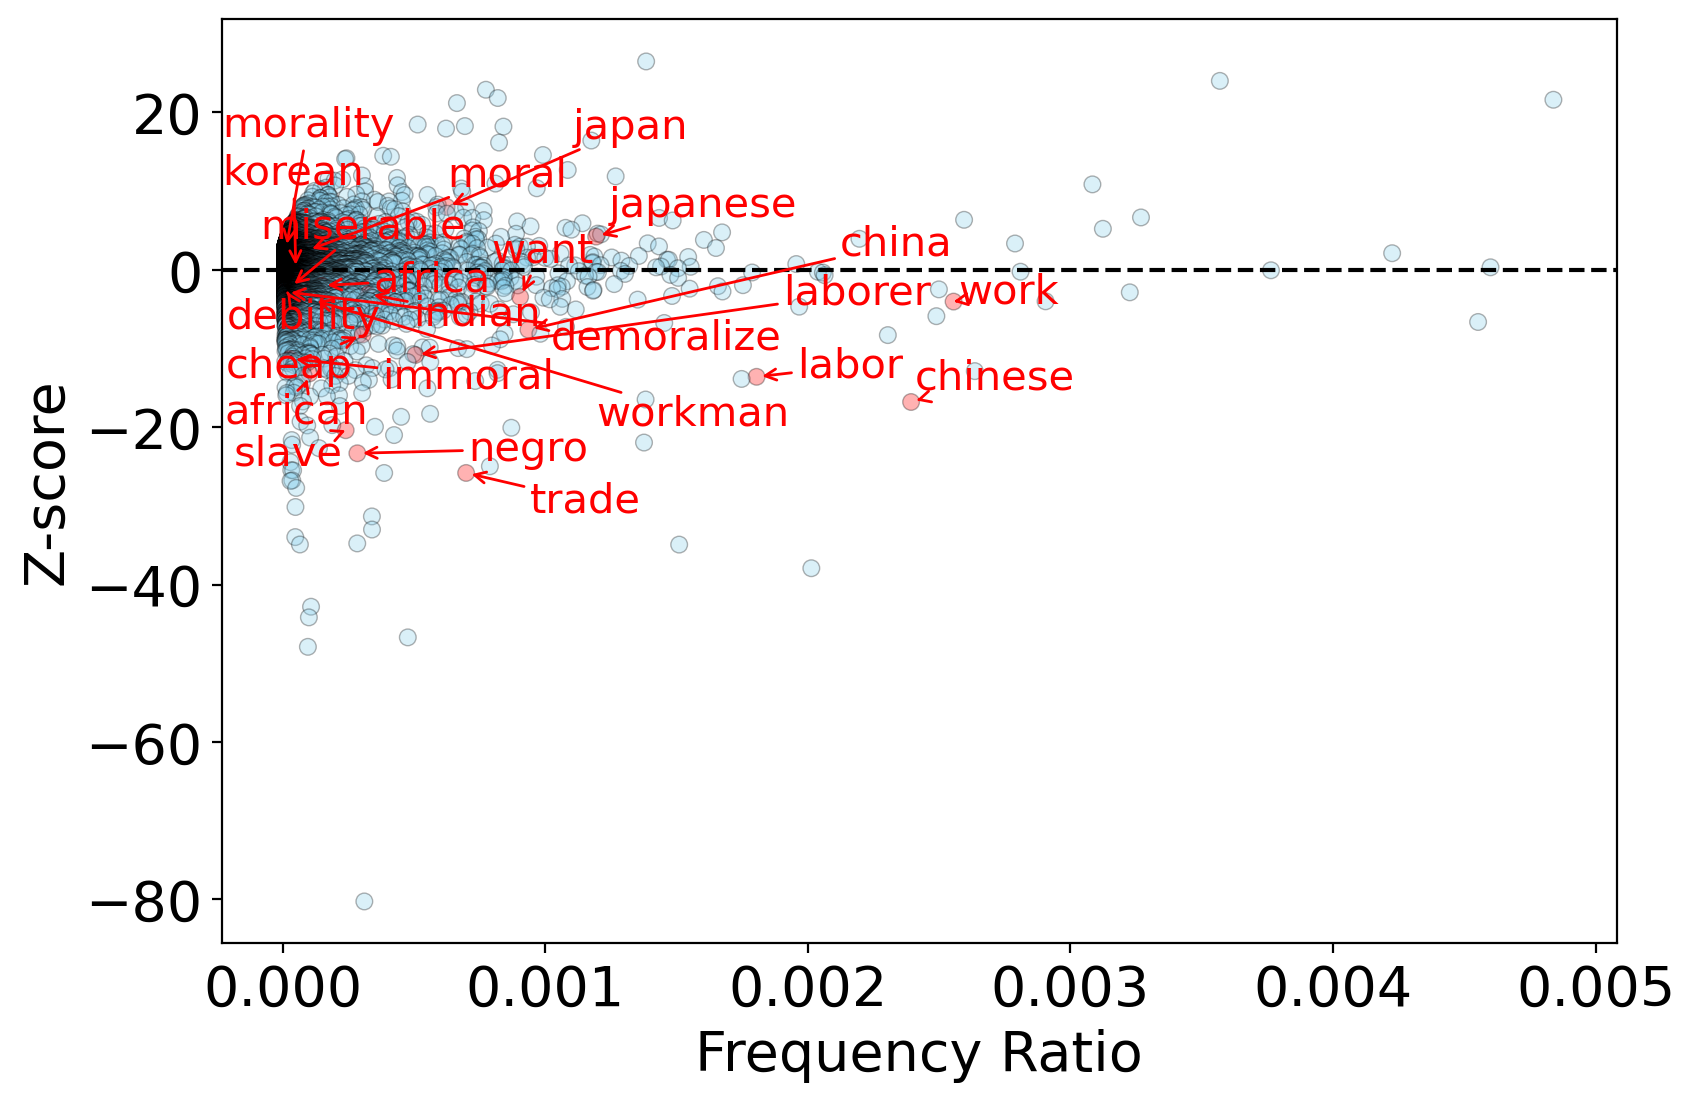

In [35]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=200)
scatter = plt.scatter(y=subviz_df['z-score'], x=subviz_df['freq_ratio'], 
           alpha=0.3, color=subviz_df['color'],
           marker='o', edgecolors='black', linewidths=0.5)
ax.axhline(y=0.0005, color='black', linestyle='--')

# List of tokens to annotate and their corresponding colors
tokens_to_annotate = color_mapping

annotations = []
for idx, row in subviz_df.iterrows():
    token = row['token']
    if token in tokens_to_annotate:
        color = tokens_to_annotate[token]
        annotation = ax.annotate(token, (row['freq_ratio'], row['z-score']), color=color, fontsize=15)
        annotations.append(annotation)

# Use adjust_text to prevent label overlap
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='red'))

ax.tick_params(axis='both', which='both', labelsize=20)  # Increase tick label font size

plt.xlabel('Frequency Ratio', fontsize=20)
plt.ylabel('Z-score', fontsize=20)


# Save the plot to a file (e.g., PDF)
plt.savefig('eacl2023_latex/figure/' + 'z-score-middle2.pdf', bbox_inches='tight', dpi=200)

plt.show()


emotion detection

In [1]:
from nrclex import NRCLex
import pandas as pd

In [3]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/sent/'
emo_df=pd.read_csv(path+'viz.csv')

In [4]:
NRCLex('miserable').affect_frequencies

{'fear': 0.0,
 'anger': 0.25,
 'anticip': 0.0,
 'trust': 0.0,
 'surprise': 0.0,
 'positive': 0.0,
 'negative': 0.25,
 'sadness': 0.25,
 'disgust': 0.25,
 'joy': 0.0}

In [6]:
token_emotion={}
for token in emo_df['token']:
    emotion=NRCLex(str(token))
    token_emotion[str(token)]=emotion.affect_frequencies

In [7]:
token_emotion_df=pd.DataFrame.from_dict(token_emotion).T.reset_index()
token_emotion_df=token_emotion_df.rename({'index':'token'}, axis=1)

In [10]:
emo_merged=pd.merge(token_emotion_df, emo_df, on='token')
emo_south=emo_merged[emo_merged['z-score']<0]
emo_rest=emo_merged[emo_merged['z-score']>0]

In [11]:
print(emo_south.shape, emo_rest.shape)

(5994, 15) (9004, 15)


In [12]:
emo_mean_south={}
for col in ['fear', 'anger', 'anticip', 'trust', 'surprise', 'sadness', 'disgust', 'joy']:
    if col != 'anticip':
        emo_mean_south[col]=emo_south[col].mean()
    elif col == 'anticip':
        emo_mean_south['anticipation']=emo_south[col].mean()

In [13]:
emo_mean_rest={}
for col in ['fear', 'anger', 'anticip', 'trust', 'surprise', 'sadness', 'disgust', 'joy']:
    if col != 'anticip':
        emo_mean_rest[col]=emo_rest[col].mean()
    elif col == 'anticip':
        emo_mean_rest['anticipation']=emo_rest[col].mean()

In [14]:
emo_mean_south

{'fear': 0.015499891425817352,
 'anger': 0.010853313631091408,
 'anticipation': 0.0,
 'trust': 0.02229398710880192,
 'surprise': 0.00594589298293002,
 'sadness': 0.0132379072193887,
 'disgust': 0.011070660607697645,
 'joy': 0.007982453352823722}

In [15]:
emo_mean_rest

{'fear': 0.015742870893359562,
 'anger': 0.012502644327388884,
 'anticipation': 0.0,
 'trust': 0.027395231748852365,
 'surprise': 0.006807820862685368,
 'sadness': 0.010608115969621967,
 'disgust': 0.007871898203972837,
 'joy': 0.007880624484356159}

entire emotion

In [4]:
from nrclex import NRCLex
import pandas as pd
from ast import literal_eval
from tqdm import tqdm

In [2]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/sent/'
df=pd.read_csv(path+'coolie-lemma-df-sent.csv', converters={'state':literal_eval, 'context':literal_eval, 'city':literal_eval, 'sent_token':literal_eval})

In [5]:
sent_emotion={}
for idx, token in tqdm(enumerate(df['sent_lemma'])):
    emotion=NRCLex(str(token))
    sent_emotion[idx]=emotion.affect_frequencies

118054it [01:07, 1741.28it/s]


In [6]:
sent_emotion_df=pd.DataFrame.from_dict(sent_emotion).T
# sent_emotion_df=sent_emotion_df.rename({'index':'token'}, axis=1)

In [7]:
sent_emotion_df['anticipation']=sent_emotion_df['anticipation'].fillna(0)

In [8]:
sent_emotion_df['anticipation']=sent_emotion_df['anticip']+sent_emotion_df['anticipation']
sent_emotion_df=sent_emotion_df.drop(columns=['anticip'])

In [18]:
sent_emotion_df.columns

Index(['fear', 'anger', 'trust', 'surprise', 'positive', 'negative', 'sadness',
       'disgust', 'joy', 'anticipation'],
      dtype='object')

In [9]:
emo_merged=pd.merge(sent_emotion_df, df, left_index=True, right_index=True)

In [10]:
emo_merged['state_str']=emo_merged['state'].str[0]

In [12]:
emo_merged=emo_merged[~emo_merged['state_str'].isnull()]
emo_merged=emo_merged[emo_merged['state_str']!='Virgin Islands']
emo_merged=emo_merged[emo_merged['state_str']!='Puerto Rico']

In [15]:
emo_merged.groupby(by='state_str').mean()['fear'].sort_values(ascending=False)

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_78441/3020151746.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emo_merged.groupby(by='state_str').mean()['fear'].sort_values(ascending=False)


state_str
Rhode Island            0.085298
New Mexico              0.080998
Utah                    0.080828
Minnesota               0.079705
North Dakota            0.075604
South Dakota            0.074107
Texas                   0.073370
Massachusetts           0.073315
Kentucky                0.073286
Georgia                 0.073275
Iowa                    0.072923
Vermont                 0.072766
Ohio                    0.072664
Florida                 0.071999
Kansas                  0.071698
Alabama                 0.071234
Colorado                0.071121
Nebraska                0.070916
Oregon                  0.070270
Wisconsin               0.070161
Illinois                0.070036
Idaho                   0.069886
Missouri                0.069761
Alaska                  0.069478
Louisiana               0.069403
California              0.069307
Michigan                0.068515
Maine                   0.068472
Delaware                0.068116
North Carolina          0.067946


In [19]:
emo_merged.groupby(by='state_str').mean()['anger'].sort_values(ascending=False)

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_78441/338065756.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emo_merged.groupby(by='state_str').mean()['anger'].sort_values(ascending=False)


state_str
Minnesota               0.065515
Rhode Island            0.063466
Utah                    0.063278
South Dakota            0.061840
Florida                 0.057530
Delaware                0.057394
Illinois                0.057307
Iowa                    0.057094
Massachusetts           0.057039
Kansas                  0.054488
Ohio                    0.053819
North Dakota            0.053583
North Carolina          0.053307
Kentucky                0.053284
Louisiana               0.053283
New Jersey              0.053176
Pennsylvania            0.052326
Georgia                 0.052081
Michigan                0.051827
New York                0.051684
Texas                   0.051664
Colorado                0.051456
Indiana                 0.051440
New Mexico              0.050853
Wyoming                 0.050495
Nevada                  0.050253
Nebraska                0.049976
Maryland                0.049972
Maine                   0.049943
Wisconsin               0.049593


In [16]:
emo_merged.groupby(by='state_str').mean()['trust'].sort_values(ascending=False)

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_78441/2200684686.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emo_merged.groupby(by='state_str').mean()['trust'].sort_values(ascending=False)


state_str
Massachusetts           0.160612
Oregon                  0.149428
Utah                    0.146865
Nevada                  0.145100
Wyoming                 0.144622
Hawaii                  0.144306
Colorado                0.144193
Alabama                 0.142836
California              0.141352
Missouri                0.140981
Nebraska                0.140197
North Carolina          0.140028
Maine                   0.139413
Wisconsin               0.138406
Ohio                    0.138046
South Dakota            0.137917
Alaska                  0.137636
Illinois                0.137185
Washington              0.136237
Rhode Island            0.135705
Iowa                    0.135472
Kentucky                0.135278
Texas                   0.134225
Maryland                0.134114
South Carolina          0.134062
Arkansas                0.133566
Oklahoma                0.133551
North Dakota            0.133428
Georgia                 0.132775
Kansas                  0.132412
